<a href="https://colab.research.google.com/github/focussed/etivity1/blob/master/Etivity1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Query to solve
What type of profile of customer has taken out a loan?
and secondly, where customers who took out a loan more likely to have a poutcome of success?

In [0]:
# The Python modules uses in this tutorial are:

# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sort=True

url_train = 'https://raw.githubusercontent.com/focussed/etivity1/master/bank.csv'
df = pd.read_csv(url_train)

First, lets look at some of the data's general characteristics

In [80]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [81]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


The describe function treats the numeric fields of the dataset, calculating the useful statistic information such as mean, standard deviation, quartile values and max and min values for the 2000 samples.

A data clean is needed on the input forms as the age is not specified for all customers.  These rows should be identified and values entered.  Age may or may not be necessary for the bank.  However, for the bank to make decisions based on age may result in a false premise if the value is not recorded for all clients in the dataset.

It can be seen that the average balance amount is 1413 and the standard deviation is quite high at 3131



The next stage is to consider text based data and examine the individual columns for integrity.



In [82]:
df.dtypes

age           float64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
subscribed     object
dtype: object

# Analysis of columns
Discover dataset for customers with loans

In [83]:
loanCustomers = df.loc[df.loan=='yes']
loanCustomers

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
6,34.0,blue-collar,married,secondary,no,1924,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,45.0,services,divorced,secondary,no,396,yes,yes,cellular,1,apr,251,4,329,4,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,62.0,retired,married,secondary,no,2801,yes,yes,cellular,9,sep,261,1,183,1,success,yes
1943,49.0,management,married,tertiary,no,1093,yes,yes,cellular,15,sep,316,1,246,4,success,yes
1960,49.0,management,married,tertiary,no,1167,yes,yes,cellular,24,sep,249,1,91,14,success,yes
1969,35.0,management,single,tertiary,no,992,no,yes,cellular,1,sep,238,1,-1,0,NaN,yes


## Find out the jobs of customers who took out loans
We will compare this to the overall set of customer jobs in the dataset

In [84]:
a = loanCustomers['job'].value_counts()
jobslist = pd.Series(a)
jobslist

technician       54
management       50
blue-collar      43
admin.           35
services         28
retired          14
entrepreneur     10
self-employed     8
unemployed        7
housemaid         1
Name: job, dtype: int64

In [85]:
b = df['job'].value_counts() 
allCustomersJobs = pd.Series(b)
allCustomersJobs

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

In [86]:
jobCompare = pd.concat([jobslist, allCustomersJobs], axis=1, sort=True).reset_index()
jobCompare.columns = ['job', 'GotLoan', 'Total']
jobCompare

,job,GotLoan,Total
0,admin.,35.0,247
1,blue-collar,43.0,298
2,entrepreneur,10.0,45
3,housemaid,1.0,35
4,management,50.0,461
5,retired,14.0,162
6,self-employed,8.0,64
7,services,28.0,165
8,student,NaN,96
9,technician,54.0,348


In [87]:
jobCompare['perc'] = jobCompare['GotLoan'] / jobCompare['Total'] * 100

jobCompare


,job,GotLoan,Total,perc
0,admin.,35.0,247,14.170040
1,blue-collar,43.0,298,14.429530
2,entrepreneur,10.0,45,22.222222
3,housemaid,1.0,35,2.857143
4,management,50.0,461,10.845987
5,retired,14.0,162,8.641975
6,self-employed,8.0,64,12.500000
7,services,28.0,165,16.969697
8,student,NaN,96,NaN
9,technician,54.0,348,15.517241


### Now we have a percentage of jobs with loans vs total job count
**We can conclude that entrepreneurs are the most likely group of people to take out loans, followed by those in the service industry.**

[]

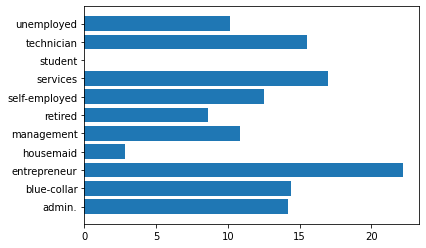

In [88]:



plt.barh(jobCompare['job'], jobCompare['perc'])
plt.plot(title='Job type Loan Count')


## Education vs Loans
We now look at the education of people who got loans

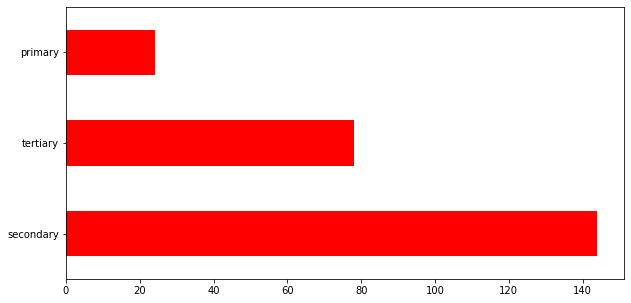

In [89]:
loanCustomers['education'].value_counts().plot(kind='barh', color='red', figsize=(10,5))

We can conclude from this that the majority of customers who took out loans were those who only had a secondary education

## The balance of customers how took out loans
We use a histogram to graph the profile of the customer's balance who took out loans.

We can see that the vast majority of the customers who took out loans had a balance of < 2000 euro


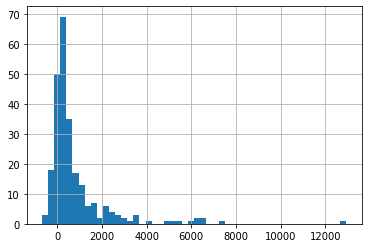

In [90]:
loanCustomers['balance'].hist(bins=50)

## Finally, we compare the number of customers who took out loans to the poutcome success or failure


In [91]:
lc = loanCustomers['poutcome'].value_counts()
lc



failure    189
success     17
other       12
Name: poutcome, dtype: int64

In [92]:
allc = df['poutcome'].value_counts()
allc

failure    955
success    444
other      147
Name: poutcome, dtype: int64

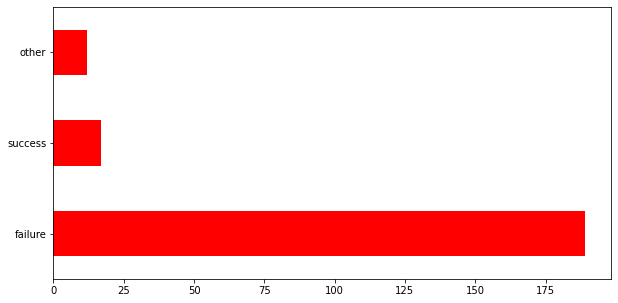

In [93]:
loanCustomers['poutcome'].value_counts().plot(kind='barh', color='red', figsize=(10,5))

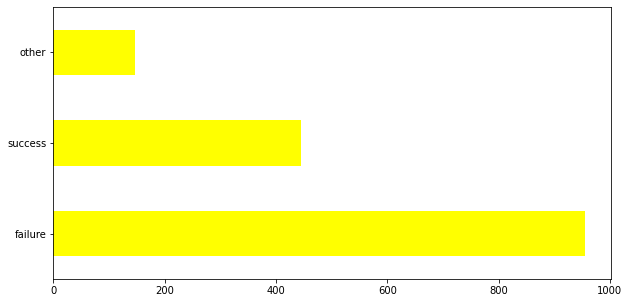

In [94]:
df['poutcome'].value_counts().plot(kind='barh', color='yellow', figsize=(10,5))


# Conclusion
We can conclude that entrepreneurs are the most likely group of people to take out loans, followed by those in the service industry.

We also see that the profile of poutcome of customers taking out loans have a much larger failure % than that of all customers